In [1]:
import sys
import numpy as np
from astropy.io import fits
from astroscrappy import detect_cosmics
from matplotlib import pyplot as plt 
sys.path.append('aspired')

import twodspec

In [2]:
# Example data from SPRAT
# LHS6328 companion WD
sprat_data = fits.open('examples/v_e_20180906_22_1_0_2.fits')[0].data

aspired/twodspec.py:96: RuntimeWarning: invalid value encountered in log10
  np.log10(img),


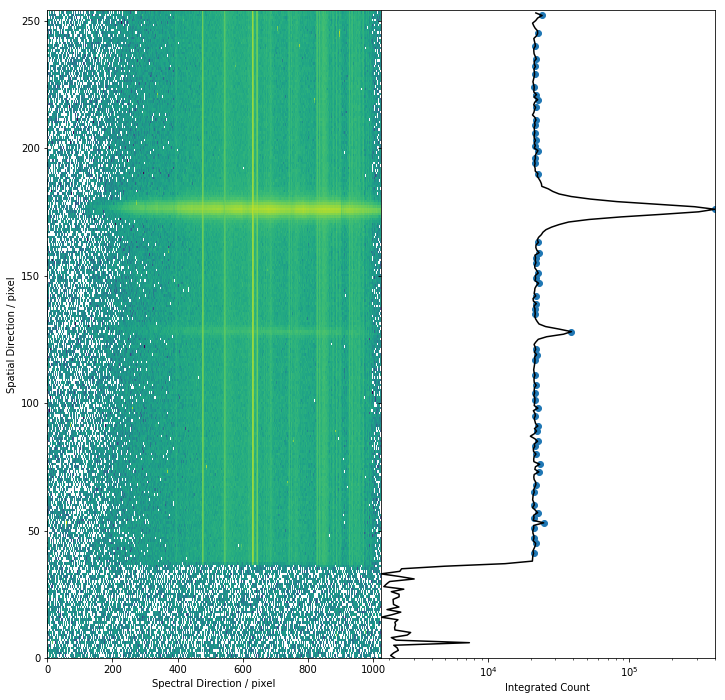

In [3]:
# (1) example of twodspec._find_peaks() without cosmic ray removal

# Set the spectral and spatial direction
Saxis = 1
Waxis = 0

# get the length in the spectral and spatial directions
spec_size = np.shape(sprat_data)[Waxis]
spatial_size = np.shape(sprat_data)[Saxis]

# the valid y-range of the chip (an array of int)
ydata = np.arange(spec_size)
ztot = np.sum(sprat_data, axis=Saxis)

peaks_y, heights_y = twodspec._find_peaks(sprat_data, spec_size, spatial_size, ydata, ztot, f_height=0.05, display=True)

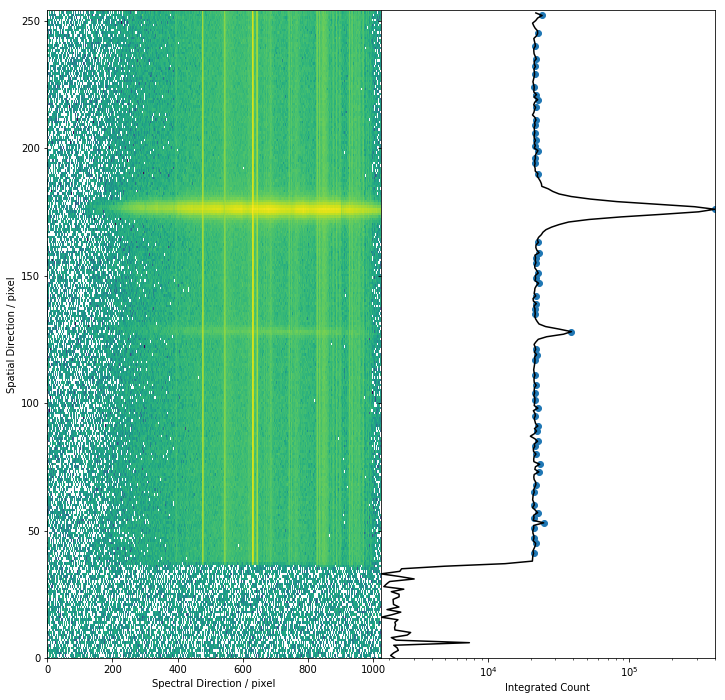

In [4]:
# (2) example of twodspec._find_peaks() with cosmic ray removal
peaks_y, heights_y = twodspec._find_peaks(detect_cosmics(sprat_data)[1], spec_size, spatial_size, ydata, ztot, f_height=0.05, display=True)

Tracing Aperture using nsteps=20


aspired/twodspec.py:208: RuntimeWarning: invalid value encountered in log10
  np.log10(img),


Spectrum 1 : Trace gaussian width = [2.94751393 1.54376803 1.46146913 1.50749228 1.50961544 1.52682242
 1.49347509 1.4820562  1.48738562 1.46975284 1.44172841 1.44389868
 1.42738758 1.43194994 1.41758669 1.41737149 1.42540835 1.37686243
 1.29978828 0.        ] pixels
Step 1 of 20 of spectrum 2 of 7 has a poor fit. Initial guess is used instead.
Spectrum 2 : Trace gaussian width = [0.         1.31492345 1.24929456 1.42547014 1.22574967 1.35105008
 1.30532652 1.26690352 1.19523656 1.16771396 1.11725876 1.15727857
 1.08125121 1.07810369 0.94556333 1.06824582 1.10548504 0.96903254
 1.02033016 0.        ] pixels
Step 3 of 20 of spectrum 3 of 7 has a poor fit. Initial guess is used instead.
Step 4 of 20 of spectrum 3 of 7 has a poor fit. Initial guess is used instead.
Step 6 of 20 of spectrum 3 of 7 has a poor fit. Initial guess is used instead.
Step 7 of 20 of spectrum 3 of 7 cannot be fitted.
Spectrum 3 : Trace gaussian width = [0.25643309 0.2634973  0.         0.         2.87900525 0.
 0.

/usr/local/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Step 8 of 20 of spectrum 5 of 7 has a poor fit. Initial guess is used instead.
Step 10 of 20 of spectrum 5 of 7 has a poor fit. Initial guess is used instead.
Step 11 of 20 of spectrum 5 of 7 cannot be fitted.
Spectrum 5 : Trace gaussian width = [0.         0.         2.90232567 1.19231911 0.         0.
 0.22414388 0.         3.12624517 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ] pixels
Step 1 of 20 of spectrum 6 of 7 has a poor fit. Initial guess is used instead.
Step 6 of 20 of spectrum 6 of 7 has a poor fit. Initial guess is used instead.
Step 11 of 20 of spectrum 6 of 7 has a poor fit. Initial guess is used instead.
Step 13 of 20 of spectrum 6 of 7 has a poor fit. Initial guess is used instead.
Step 14 of 20 of spectrum 6 of 7 has a poor fit. Initial guess is used instead.
Step 17 of 20 of spectrum 6 of 7 has a poor fit. Initial guess is used instead.
Step 18 of 20 of spectrum 6 of 7 has a poor fit. Initial guess is us

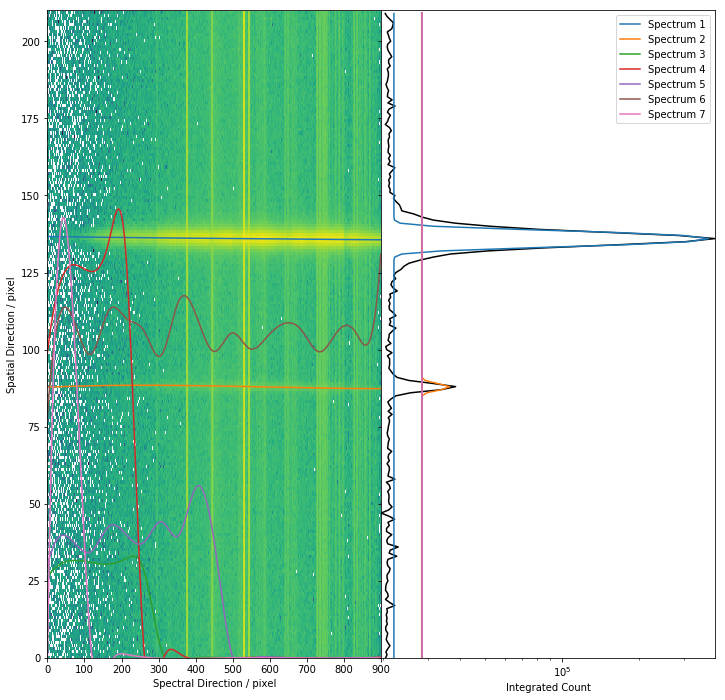

In [5]:
# (3) example of twodspec.ap_trace() with cosmic ray removal, selecting the 7 brightest spectra
#     in the pixel range covered by spatial_mask and spec_mask.
#     The 6th and 7th ones failed, error messages are printed but the code continues to run.

spatial_mask = np.arange(40,250)
spec_mask = np.arange(100,1000)

my, y_sigma = twodspec.ap_trace(sprat_data, nsteps=20, spatial_mask=spatial_mask, spec_mask=spec_mask,
                                cosmic=True, n_spec=7, recenter=False, prevtrace=(0, ), bigbox=8, Saxis=1,
                                nomessage=False, display=True)